In [2]:
# !pip install torchaudio==0.9.0
import torch
import torchaudio
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from torch.utils.data import DataLoader



## 0. Download dataset MTAT
- `wget` is a linux command to download a file from web

In [3]:
!wget http://mi.soi.city.ac.uk/datasets/magnatagatune/mp3.zip.001
!wget http://mi.soi.city.ac.uk/datasets/magnatagatune/mp3.zip.002
!wget http://mi.soi.city.ac.uk/datasets/magnatagatune/mp3.zip.003

--2021-10-29 11:27:11--  http://mi.soi.city.ac.uk/datasets/magnatagatune/mp3.zip.001
Resolving mi.soi.city.ac.uk (mi.soi.city.ac.uk)... 138.40.249.126
Connecting to mi.soi.city.ac.uk (mi.soi.city.ac.uk)|138.40.249.126|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mirg.city.ac.uk/datasets/magnatagatune/mp3.zip.001 [following]
--2021-10-29 11:27:12--  https://mirg.city.ac.uk/datasets/magnatagatune/mp3.zip.001
Resolving mirg.city.ac.uk (mirg.city.ac.uk)... 138.40.249.131
Connecting to mirg.city.ac.uk (mirg.city.ac.uk)|138.40.249.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100000000 (1.0G) [application/zip]
Saving to: 'mp3.zip.001.1'

mp3.zip.001.1         9%[>                   ]  96.76M   174KB/s    eta 75m 2s ^C
--2021-10-29 11:34:51--  http://mi.soi.city.ac.uk/datasets/magnatagatune/mp3.zip.002
Resolving mi.soi.city.ac.uk (mi.soi.city.ac.uk)... 138.40.249.126
Connecting to mi.soi.city.ac.uk (mi.soi.c

- Concatenate the zip files and unzip it

In [ ]:
!cat mp3.zip.* > mp3_all.zip
!unzip -q mp3_all.zip -d MTAT/

- Download meta data

In [ ]:
!wget http://mi.soi.city.ac.uk/datasets/magnatagatune/annotations_final.csv -P MTAT/
!wget http://mi.soi.city.ac.uk/datasets/magnatagatune/clip_info_final.csv -P MTAT/


--2021-10-11 06:32:10--  http://mi.soi.city.ac.uk/datasets/magnatagatune/annotations_final.csv
Resolving mi.soi.city.ac.uk (mi.soi.city.ac.uk)... 138.40.249.126
Connecting to mi.soi.city.ac.uk (mi.soi.city.ac.uk)|138.40.249.126|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mirg.city.ac.uk/datasets/magnatagatune/annotations_final.csv [following]
--2021-10-11 06:32:11--  https://mirg.city.ac.uk/datasets/magnatagatune/annotations_final.csv
Resolving mirg.city.ac.uk (mirg.city.ac.uk)... 138.40.249.131
Connecting to mirg.city.ac.uk (mirg.city.ac.uk)|138.40.249.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21517373 (21M) [text/csv]
Saving to: ‘mtat_dataset/annotations_final.csv’

annotations_final.c 100%[===================>]  20.52M  6.25MB/s    in 3.3s    

2021-10-11 06:32:16 (6.25 MB/s) - ‘mtat_dataset/annotations_final.csv’ saved [21517373/21517373]

--2021-10-11 06:32:16--  http://mi.soi.city.ac.uk/data

## 1. Look at the Dataset
- Use `df.keys()`
- Using `pandas` as `pd`

In [3]:
data_dir = Path('../MTAT/')

In [3]:
meta = pd.read_csv(data_dir / "clip_info_final.csv", delimiter='\t')
labels = pd.read_csv(data_dir / "annotations_final.csv", delimiter='\t')

In [4]:
labels

,clip_id,no voice,singer,duet,plucking,hard rock,world,bongos,harpsichord,female singing,...,rap,metal,hip hop,quick,water,baroque,women,fiddle,english,mp3_path
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25858,58899,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-56-la_bres...
25859,58906,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-57-lost_is...
25860,58907,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-57-lost_is...
25861,58908,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-57-lost_is...


In [10]:
meta.head()

,clip_id,track_number,title,artist,album,url,segmentStart,segmentEnd,original_url,mp3_path
0,2,1,BWV54 - I Aria,American Bach Soloists,J.S. Bach Solo Cantatas,http://www.magnatune.com/artists/albums/abs-so...,30,59,http://he3.magnatune.com/all/01--BWV54%20-%20I...,f/american_bach_soloists-j_s__bach_solo_cantat...
1,6,1,BWV54 - I Aria,American Bach Soloists,J.S. Bach Solo Cantatas,http://www.magnatune.com/artists/albums/abs-so...,146,175,http://he3.magnatune.com/all/01--BWV54%20-%20I...,f/american_bach_soloists-j_s__bach_solo_cantat...
2,10,1,BWV54 - I Aria,American Bach Soloists,J.S. Bach Solo Cantatas,http://www.magnatune.com/artists/albums/abs-so...,262,291,http://he3.magnatune.com/all/01--BWV54%20-%20I...,f/american_bach_soloists-j_s__bach_solo_cantat...
3,11,1,BWV54 - I Aria,American Bach Soloists,J.S. Bach Solo Cantatas,http://www.magnatune.com/artists/albums/abs-so...,291,320,http://he3.magnatune.com/all/01--BWV54%20-%20I...,f/american_bach_soloists-j_s__bach_solo_cantat...
4,12,1,BWV54 - I Aria,American Bach Soloists,J.S. Bach Solo Cantatas,http://www.magnatune.com/artists/albums/abs-so...,320,349,http://he3.magnatune.com/all/01--BWV54%20-%20I...,f/american_bach_soloists-j_s__bach_solo_cantat...


In [13]:
print(labels.columns.tolist()) # Column의 이름을 불러옴

['clip_id', 'no voice', 'singer', 'duet', 'plucking', 'hard rock', 'world', 'bongos', 'harpsichord', 'female singing', 'clasical', 'sitar', 'chorus', 'female opera', 'male vocal', 'vocals', 'clarinet', 'heavy', 'silence', 'beats', 'men', 'woodwind', 'funky', 'no strings', 'chimes', 'foreign', 'no piano', 'horns', 'classical', 'female', 'no voices', 'soft rock', 'eerie', 'spacey', 'jazz', 'guitar', 'quiet', 'no beat', 'banjo', 'electric', 'solo', 'violins', 'folk', 'female voice', 'wind', 'happy', 'ambient', 'new age', 'synth', 'funk', 'no singing', 'middle eastern', 'trumpet', 'percussion', 'drum', 'airy', 'voice', 'repetitive', 'birds', 'space', 'strings', 'bass', 'harpsicord', 'medieval', 'male voice', 'girl', 'keyboard', 'acoustic', 'loud', 'classic', 'string', 'drums', 'electronic', 'not classical', 'chanting', 'no violin', 'not rock', 'no guitar', 'organ', 'no vocal', 'talking', 'choral', 'weird', 'opera', 'soprano', 'fast', 'acoustic guitar', 'electric guitar', 'male singer', 'ma

- Some of the tags have different name but represents almost same things
- Below are the example of defining synonyms among tags

In [4]:
# From https://github.com/keunwoochoi/magnatagatune-list
synonyms = [['beat', 'beats'],
			['chant', 'chanting'],
			['choir', 'choral'],
			['classical', 'clasical', 'classic'],
			['drum', 'drums'],
			['electro', 'electronic', 'electronica', 'electric'],
			['fast', 'fast beat', 'quick'],
			['female', 'female singer', 'female singing', 'female vocals', 'female voice', 'woman', 'woman singing', 'women'],
			['flute', 'flutes'],
			['guitar', 'guitars'],
			['hard', 'hard rock'],
			['harpsichord', 'harpsicord'],
			['heavy', 'heavy metal', 'metal'],
			['horn', 'horns'],
			['india', 'indian'],
			['jazz', 'jazzy'],
			['male', 'male singer', 'male vocal', 'male vocals', 'male voice', 'man', 'man singing', 'men'],
			['no beat', 'no drums'],
			['no singer', 'no singing', 'no vocal','no vocals', 'no voice', 'no voices', 'instrumental'],
			['opera', 'operatic'],
			['orchestra', 'orchestral'],
			['quiet', 'silence'],
			['singer', 'singing'],
			['space', 'spacey'],
			['string', 'strings'],
			['synth', 'synthesizer'],
			['violin', 'violins'],
			['vocal', 'vocals', 'voice', 'voices'],
			['strange', 'weird']]

In [18]:
lab

0        0
1        0
2        0
3        0
4        0
        ..
25858    0
25859    0
25860    0
25861    0
25862    0
Length: 25863, dtype: int64

In [21]:
labels = pd.read_csv(data_dir / "annotations_final.csv", delimiter='\t')
for syn in synonyms:
  for i in range(1, len(syn)):
    labels[syn[0]] += labels[syn[1]]
  labels = labels.drop(columns=syn[1:])
  labels[syn[0]] = np.minimum(labels['beat'].values, 1)
tag = [key for key in labels.keys() if not key in ('clip_id', 'mp3_path')]
len(tag), tag[:10]
labels

,clip_id,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,...,soft,noise,choir,rap,hip hop,water,baroque,fiddle,english,mp3_path
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25858,58899,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-56-la_bres...
25859,58906,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-57-lost_is...
25860,58907,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-57-lost_is...
25861,58908,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8/jacob_heringman-blame_not_my_lute-57-lost_is...


In [28]:
labels['water'].values.sum()

83

In [30]:
labels[labels['water']==1]

,clip_id,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,...,soft,noise,choir,rap,hip hop,water,baroque,fiddle,english,mp3_path
228,494,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,d/satori-golden_dreams-01-aurora-784-813.mp3
229,497,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,d/satori-golden_dreams-01-aurora-871-900.mp3
497,1185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,d/paul_avgerinos-maya__the_great_katun-01-dawn...
1240,2698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5/dj_markitos-unreachable_destiny-01-manteia-0...
1831,3962,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5/satori-for_relaxation-01-rain_surround-117-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18883,41411,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,5/paul_avgerinos-muse_of_the_round_sky-09-the_...
19811,43551,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7/artemis-gravity-10-only_begun-523-552.mp3
20415,44872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,c/liquid_zen-oscilloscope-10-zeitgeist-233-262...
20850,45876,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2/jesse_manno-sea_spirits-11-in_her_room-0-29.mp3


In [35]:
water_path = labels[labels['water']==1]['mp3_path'].values[0]

In [36]:
data_dir/water_path

PosixPath('../MTAT/d/satori-golden_dreams-01-aurora-784-813.mp3')

In [37]:
audio, sr = torchaudio.load(data_dir/water_path)

In [38]:
ipd.Audio(audio, rate=sr)

In [ ]:
class MTATDataset:
  def __init__(self, dir, top_k=50, min_tag_occur=1, synonyms=(), max_num_data=None, sr=16000, split='train'):
    self.dir = dir
    self.meta = pd.read_csv(dir / "clip_info_final.csv", delimiter='\t')
    self.labels = pd.read_csv(dir / "annotations_final.csv", delimiter='\t')
    self.sr = sr

    self.get_tag_names()
    self.combine_tags(synonyms)
    self.filter_top_k_tags(top_k)
    self.filter_minimum_tag(min_tag_occur)

    if split=="train":
      sub_dir_ids = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c']
    elif split=='valid':
      sub_dir_ids = ['d']
    else: #test
      sub_dir_ids = ['e', 'f', 'g']

    is_in_set = [True if x[0] in sub_dir_ids else False for x in self.labels['mp3_path'].values.astype('str')]
    self.labels = self.labels.iloc[is_in_set]
    is_pt_file_exists = [(self.dir/x).with_suffix('.pt').exists() for x in self.labels['mp3_path'].values.astype('str')]
    self.labels = self.labels.iloc[is_pt_file_exists]
    
    if max_num_data and max_num_data < len(self.labels):
      self.labels = self.labels.sample(max_num_data)
      # self.labels = self.labels.iloc[:max_num_data]

    self.vocab = self.labels.columns.values[1:-1]
    # self.audios = self.load_audio()
    self.audios = self.load_pre_processed_data()
    self.label_tensor = self.convert_label_to_tensor()

  def get_tag_names(self):
    self.tag_names = [key for key in self.labels.keys() if not key in ('clip_id', 'mp3_path')]

  def combine_tags(self, synonyms):
    for syn in synonyms:
      for i in range(1, len(syn)):
        self.labels[syn[0]] += self.labels[syn[i]]
      self.labels = self.labels.drop(columns=syn[1:])
      self.labels[syn[0]] = np.minimum(self.labels[syn[0]].values, 1)
    self.get_tag_names()

  def clip_id_to_tag(self, clip_id):
    return torch.Tensor(self.labels[self.labels['clip_id']==clip_id].values[0,1:-1].astype(int))

  def filter_top_k_tags(self, k=50):
    tag_count = [sum(self.labels[tag]) for tag in self.tag_names]
    descending_sorted_idx = sorted(range(len(tag_count)), key=lambda k: -tag_count[k])
    filtered_tag_names = np.asarray(self.tag_names)[descending_sorted_idx[:k]].tolist()
    for tag in self.tag_names:
      if tag not in filtered_tag_names:
        self.labels = self.labels.drop(columns=tag)
    self.tag_names = filtered_tag_names
  
  def filter_minimum_tag(self, min_tag=1):
    tag_occurs_by_song = np.sum(self.labels[self.tag_names].values, axis=1)
    self.labels = self.labels.drop(index=np.where(tag_occurs_by_song < min_tag)[0])

  def load_audio(self):
    audios = []
    fail_idx = []
    for idx in tqdm(range(len(self.labels))):
      try:
        audio, sr = torchaudio.load(self.dir / self.labels.iloc[idx]['mp3_path'])
        if sr != self.sr:
          audio = torchaudio.transforms.Resample(orig_freq=sr, new_freq=self.sr)(audio)
        audios.append(audio)
      # try
      except:
        fail_idx.append(idx)
    self.labels = self.labels.drop(index=fail_idx)
    return audios

  def load_pre_processed_data(self):
    audios = [torch.load( (self.dir / self.labels.iloc[idx]['mp3_path']).with_suffix('.pt'))['audio'][0] for idx in tqdm(range(len(self.labels)))]
    return audios

  def convert_label_to_tensor(self):
    return torch.LongTensor(self.labels.values[:, 1:-1].astype('bool'))

  def __getitem__(self, idx):
    audio = self.audios[idx]
    tag = self.label_tensor[idx]
    return audio, tag

  def __len__(self):
    return len(self.labels)


dataset = MTATDataset(data_dir, top_k=50,  synonyms=synonyms)
valid_dataset= MTATDataset(data_dir, top_k=50, synonyms=synonyms, max_num_data=1000, split='valid')
test_dataset = MTATDataset(data_dir, top_k=50,  synonyms=synonyms, max_num_data=2000, split='test')

 43%|██████████████████████████████████████████████████████████████████▉                                                                                         | 7274/16959 [00:41<00:46, 207.57it/s]

In [72]:
audio, tag = dataset[0]
print(audio)
print(tag)

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.1921e-07,
        -4.1723e-07, -4.1723e-07])
tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0])


In [73]:
dataset.vocab

array(['singer', 'harpsichord', 'sitar', 'heavy', 'foreign', 'no piano',
       'classical', 'female', 'jazz', 'guitar', 'quiet', 'solo', 'folk',
       'ambient', 'new age', 'synth', 'drum', 'bass', 'loud', 'string',
       'opera', 'fast', 'country', 'violin', 'electro', 'trance', 'chant',
       'strange', 'modern', 'hard', 'harp', 'pop', 'female vocal',
       'piano', 'orchestra', 'eastern', 'slow', 'male', 'vocal',
       'no singer', 'india', 'rock', 'dance', 'cello', 'techno', 'flute',
       'beat', 'soft', 'choir', 'baroque'], dtype=object)

In [75]:
tag==1

tensor([False, False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False])

In [74]:
dataset.vocab[tag==1]

array(['no piano', 'classical', 'string', 'violin', 'orchestra', 'soft'],
      dtype=object)

In [76]:
ipd.Audio(audio, rate=16000)

In [40]:
dataset.labels

,clip_id,singer,harpsichord,sitar,heavy,foreign,no piano,classical,female,jazz,...,rock,dance,cello,techno,flute,beat,soft,choir,baroque,mp3_path
14043,30884,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,b/philharmonia_baroque-mozart_orchestral_works...
17996,39463,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1/jeff_wahl-guinevere-09-how_it_should_have_be...
23719,52584,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7/american_bach_soloists-j_s__bach__mass_in_b_...
15846,34720,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,c/liquid_zen-oscilloscope-08-autumn_glide-320-...
19139,41974,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6/philharmonia_baroque-rameau_and_leclair-10-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24230,53968,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,4/ensemble_mirable-triemer_six_cello_sonatas-1...
3651,8008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2/solace-ahsas-02-khatar_dawr_hindi_78-175-204...
23051,50900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c/william_brooks-blue_ribbon__the_best_of_will...
9776,21431,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6/sand_craig_and_dornenburg-biber_violin_sonat...


- Make Dataloader with `torch.utils.data.DataLoader`

In [6]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=256, shuffle=False)


- Check batch

In [8]:
batch = next(iter(train_loader))
audio, label = batch
print(audio.shape)
print(label.shape)


torch.Size([128, 465984])
torch.Size([128, 50])


In [82]:
465984/16000

29.124

## Make model

In [125]:
# CNN_layer
dummy = torch.arange(7).view(1, 1,-1).float()
dummy, dummy.shape

(tensor([[[0., 1., 2., 3., 4., 5., 6.]]]), torch.Size([1, 1, 7]))

In [128]:
cnn_layer = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
print(cnn_layer.weight)
cnn_layer.weight.data = torch.Tensor([[[1,0.5,-1]], [[-1, -0.5, 1]]])
print(cnn_layer.weight)
cnn_layer.bias.data = torch.Tensor([0, 0])
print(cnn_layer.bias)


Parameter containing:
tensor([[[ 0.3721,  0.4420,  0.5218]],

        [[-0.2333, -0.2460,  0.2034]]], requires_grad=True)
Parameter containing:
tensor([[[ 1.0000,  0.5000, -1.0000]],

        [[-1.0000, -0.5000,  1.0000]]], requires_grad=True)
Parameter containing:
tensor([0., 0.], requires_grad=True)


In [129]:
out = cnn_layer(dummy)
print(out, out.shape)

tensor([[[-1.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  8.0000],
         [ 1.0000,  1.5000,  1.0000,  0.5000,  0.0000, -0.5000, -8.0000]]],
       grad_fn=<SqueezeBackward1>) torch.Size([1, 2, 7])


In [7]:
class SpecModel(nn.Module):
    def __init__(self, sr, n_fft, hop_length, n_mels):
        super().__init__()
        self.mel_converter = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        self.db_converter = torchaudio.transforms.AmplitudeToDB()
    
    def forward(self, audio_sample):
        mel_spec = self.mel_converter(audio_sample)
        db_spec = self.db_converter(mel_spec)
        return db_spec

# spec_model = SpecModel(sr=16000, n_fft=1024, hop_length=512, n_mels=48)
# spec = spec_model(audio)
# torch.max(spec), torch.min(spec)

In [110]:
spec.shape

torch.Size([128, 48, 911])

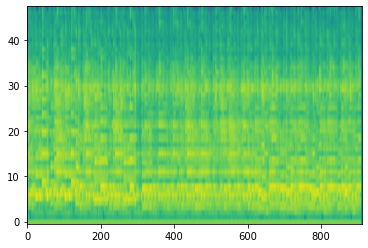

In [114]:
plt.imshow(spec[0], origin='lower', aspect='auto')

In [131]:
class AutoTaggingModel(nn.Module):
    def __init__(self, sr, n_fft, hop_length, n_mels):
        super().__init__()
        self.spec_converter = SpecModel(sr, n_fft, hop_length, n_mels)
        
        self.conv_layer = nn.Conv1d(in_channels=n_mels, out_channels=32, kernel_size=3, padding=0)
        
    def forward(self, audio_sample):
        spec = self.spec_converter(audio_sample)
        # spec.shape == Batch_size x Number of Mel Bins (Num Input Channels) X Number of Time Frames (L)
        out = self.conv_layer(spec)
        
        return out
tagging_model = AutoTaggingModel(sr=16000, n_fft=1024, hop_length=512, n_mels=48)

out = tagging_model(audio)

In [139]:
out.shape

torch.Size([128, 32, 909])

In [136]:
out[0,0, :12] # batch, channel, time
# 0번째 오디오, 0번째 채널, 첫 10개의 시간 프레임

tensor([17.1502,  3.4800,  5.3179,  1.5234,  0.0857,  5.5442,  2.8284,  0.9226,
         2.2680,  1.7723,  2.1705,  2.4945], grad_fn=<SliceBackward0>)

In [135]:
pooling = nn.MaxPool1d(3)
pooling(out[0:1,0:1,:12])

tensor([[[17.1502,  5.5442,  2.8284,  2.4945]]], grad_fn=<SqueezeBackward1>)

In [138]:
pooling_out = pooling(out)
pooling_out.shape

torch.Size([128, 32, 303])

In [43]:
class AutoTaggingModel(nn.Module):
    def __init__(self, sr, n_fft, hop_length, n_mels, hidden_size=32, output_size=50):
        super().__init__()
        self.spec_converter = SpecModel(sr, n_fft, hop_length, n_mels)
        self.sr = sr
        self.conv_layer = nn.Sequential(
            # L==911
            nn.Conv1d(in_channels=n_mels, out_channels=hidden_size, kernel_size=3, padding=0),  #L==909
            nn.MaxPool1d(3), #L=303
            nn.ReLU(),
            nn.Conv1d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=3, padding=0), #301
            nn.MaxPool1d(3), # L=100
            nn.ReLU(),
            nn.Conv1d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=3, padding=0), # 98
            nn.MaxPool1d(3),
            nn.ReLU()) # 32
        
        self.final_layer = nn.Linear(in_features=hidden_size, out_features=output_size)
        
    def forward(self, audio_sample):
        spec = self.spec_converter(audio_sample)
        # spec.shape == Batch_size x Number of Mel Bins (Num Input Channels) X Number of Time Frames (L)
        out = self.conv_layer(spec)
        out = torch.max(out, dim=-1)[0]
        out = self.final_layer(out)
        out = torch.sigmoid(out)
        return out
        
    def get_embedding(self, audio_sample):
        spec = self.spec_converter(audio_sample)
        emb = self.conv_layer[:-1](spec)
        return emb
      
tagging_model = AutoTaggingModel(sr=16000, n_fft=1024, hop_length=512, n_mels=48)


In [9]:
torch.set_printoptions(sci_mode=False)

In [159]:
out = tagging_model(audio)
print(out[:4], out.shape)

tensor([[    0.0433,     0.8752,     0.1817,     0.7250,     0.4867,     0.4539,
             0.7359,     0.5876,     0.3480,     0.9830,     0.0229,     0.8005,
             0.9094,     0.7857,     0.3910,     0.0122,     0.8209,     0.1123,
             0.2457,     0.0299,     0.8100,     0.3827,     0.4525,     0.2480,
             0.0758,     0.5314,     0.3924,     0.6072,     0.3384,     0.2881,
             0.5710,     0.4408,     0.2460,     0.2441,     0.6315,     0.1017,
             0.3333,     0.9708,     0.1839,     0.3968,     0.1763,     0.4118,
             0.1474,     0.3748,     0.7462,     0.0560,     0.6845,     0.8479,
             0.6796,     0.0225],
        [    0.0056,     0.9859,     0.0357,     0.9586,     0.7716,     0.2933,
             0.8501,     0.8286,     0.1855,     0.9995,     0.0007,     0.9783,
             0.9932,     0.9579,     0.3010,     0.0001,     0.8653,     0.0221,
             0.1811,     0.0007,     0.9289,     0.5333,     0.2254,     0.

In [47]:
batch[0]

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.6093e-06,
         -1.2517e-06, -1.5497e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  2.3842e-07,
         -5.9605e-08,  2.9802e-07],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -5.9605e-07,
         -2.9802e-07,  1.7881e-07],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.3113e-06,
         -2.0862e-06,  5.9605e-08],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  5.6624e-06,
          8.0466e-06,  7.3910e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.1921e-07,
          1.7881e-07,  1.1921e-07]])

In [44]:
def train_model(model, train_loader, valid_loader, optimizer, num_epochs, loss_func, device='cuda'):
  loss_records =[] 
  valid_acc_records = []
  model.train()
  model.vocab = train_loader.dataset.vocab
  for epoch in tqdm(range(num_epochs)):
    for batch in train_loader:
      optimizer.zero_grad()
      audio, label = batch
      pred = model(audio.to(device))
      loss = loss_func(pred, label.float().to(device))
      loss.backward()
      optimizer.step()
      loss_records.append(loss.item())
#     valid_acc = validate_model(model, valid_loader, device)
#     valid_acc_records.append(valid_acc.item())
#   return {"loss": loss_records, "valid_acc": valid_acc_records}
  return {"loss":loss_records}

model = AutoTaggingModel(sr=16000, n_fft=1024, hop_length=512, n_mels=48, output_size=50, hidden_size=32)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
model = model.to('cuda')
loss_func = torch.nn.BCELoss()
train_record = train_model(model, train_loader, valid_loader, optimizer, 200, loss_func )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:50<00:00,  2.21s/it]


In [50]:
## Save the model
# Save the Model paramters
model.state_dict()
torch.save(model.state_dict(), "week10_auto_tagging_model.pt")

In [46]:
batch = next(iter(valid_loader))
audio, label = batch

In [1]:
plt.plot(train_record['loss'])

NameError: name 'plt' is not defined

In [47]:
pred = model(audio.to('cuda'))
torch.max(pred[:4])
pred= pred.cpu()

In [176]:
zero_pred = torch.zeros_like(pred)
zero_pred[:4]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [24]:
threshold_pred = pred>0.3
print(threshold_pred[1].int())
print(label[1].int())
print(threshold_pred[1] * label[1])
print(torch.sum(threshold_pred[1] * label[1]))

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0], dtype=torch.int32)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0], dtype=torch.int32)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0])
tensor(2)


In [14]:
torch.mean( ((pred>0.5) == label).float() )

tensor(0.9365)

In [177]:
torch.mean( ((zero_pred>0.5) == label).float() )

tensor(0.9305)

In [169]:
label[:4]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0]])

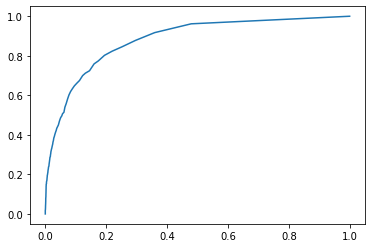

In [48]:
def plot_roc_curve(pred, target, num_grid=100):
  tprs = []
  fprs = []
  for thresh in torch.linspace(0, 1, num_grid):
    tpr, fpr = get_tpr_fpr(pred, target, thresh)
    tprs.append(tpr)
    fprs.append(fpr)
  plt.plot(fprs, tprs)

def get_roc_auc(pred, label, num_grid=500):
  auc = 0
  prev_fpr = 0
  for thresh in reversed(torch.linspace(0,1,num_grid)):
    tpr, fpr = get_tpr_fnr(pred, label, threshold=thresh)
    auc += tpr * (fpr-prev_fpr)
    prev_fpr = fpr
  return auc

def get_tpr_fpr(pred, target, threshold=0.5):
  positive = torch.sum(pred > threshold)
  threshold_pred = pred > threshold
  true_positive = torch.sum((threshold_pred==1) * (target==1))
  target_positive = torch.sum(target==1)
  target_negative = torch.sum(target==0)
  false_positive =  torch.sum((threshold_pred==1) * (target==0))
  
  return true_positive/target_positive, false_positive/target_negative

get_tpr_fpr(pred, label, threshold=0.7)

plot_roc_curve(pred, label)

In [16]:
plt.plot(train_record['valid_acc'])

KeyError: 'valid_acc'

In [19]:
batch = next(iter(valid_loader))
audio, label = batch
pred  = model(audio.cuda())

In [64]:
!pip install -U umap-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:999: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
Requirement already up-to-date: umap-learn in /home/teo/.local/lib/python3.8/site-packages (0.5.2)


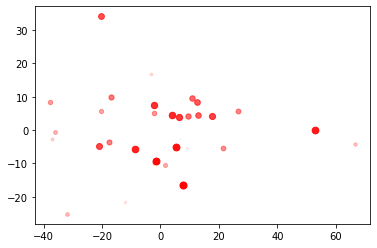

In [73]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

def load_audio_as_batch(audio_path):
  y, sr = torchaudio.load(audio_path, channels_first=True)
  if y.shape[0] > 1:
    y = torch.mean(y, dim=0)
  if sr != model.sr:
    y = torchaudio.functional.resample(y, orig_freq=sr, new_freq=model.sr)
  if len(y.shape) <2:
    y.unsqueeze_(0)
  return y

def get_embedding_of_piece(model, audio_sample_batch):
  model.eval()
  model_device = next(model.parameters()).device
  with torch.no_grad():
    pred = model.get_embedding(audio_sample_batch.to(model_device))
  pred = pred[0]
  return pred.cpu()


def get_pca_of_embedding(embedding):
  x_embedded = PCA(n_components=2).fit_transform(embedding)
  return x_embedded

def get_umap_embedding(embedding):
  reducer = umap.UMAP()
  umap_emb = reducer.fit_transform(embedding)
  return umap_emb

def plot_embedding_of_piece(model, audio_path):
  audio_sample_batch = load_audio_as_batch(audio_path)
  embedding = get_embedding_of_piece(model, audio_sample_batch)
  redc_emb = get_pca_of_embedding(embedding)
#   redc_emb = get_umap_embedding(embedding)
  
  for i, emb in enumerate(redc_emb):
    plt.scatter(emb[0], emb[1], c='red', s=(i+2)*1.5, alpha=(i+1)/len(redc_emb))
#   plt.scatter(pca_emb[:,0], pca_emb[:,1])


# plot_embedding_of_piece(model, '9.mp3')
plot_embedding_of_piece(model, 'queen_bohemian.wav')


In [30]:
pred

tensor([[1.5935e-02, 4.6113e-03, 2.0262e-02,  ..., 1.7651e-02, 1.3668e-02,
         5.1763e-03],
        [4.6141e-02, 9.2539e-03, 3.6312e-02,  ..., 3.9919e-02, 1.6017e-02,
         5.1919e-03],
        [7.1376e-02, 1.6830e-05, 2.6729e-02,  ..., 5.7634e-03, 1.3502e-03,
         7.0593e-05],
        ...,
        [1.2522e-01, 2.4189e-04, 7.3406e-02,  ..., 1.5345e-02, 2.4557e-03,
         4.1754e-04],
        [7.5230e-02, 2.6042e-03, 3.9437e-02,  ..., 2.9299e-02, 1.6167e-02,
         2.8614e-03],
        [8.9315e-02, 1.5156e-03, 7.9910e-02,  ..., 5.8303e-02, 1.3973e-02,
         2.0826e-03]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [74]:
model.vocab = train_loader.dataset.vocab

torch.save(model.state_dict(), "simple_auto_tagging.pt")


In [22]:
torch.set_printoptions(sci_mode=False)